# Time Series

In [1]:
import quandl

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

import json
import itertools
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'


/Users/apple/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
plt.rcParams['figure.figsize'] = 20,10

In [3]:
#set up API with secret key
def get_keys(path):
    with open(path) as f:
        return json.load(f)
keys = get_keys("/Users/apple/.secret/quandl_api.json")

api_key = keys['api_key']
quandl.ApiConfig.api_key = api_key
# Retrieve TSLA data from Quandl
tesla = quandl.get('WIKI/TSLA')
gm = quandl.get('WIKI/GM')

In [4]:

print(tesla.shape)
print(tesla.index.min())
print(tesla.index.max())
print(tesla.isnull().sum())
tesla.head()

(1949, 12)
2010-06-29 00:00:00
2018-03-27 00:00:00
Open           0
High           0
Low            0
Close          0
Volume         0
Ex-Dividend    0
Split Ratio    0
Adj. Open      0
Adj. High      0
Adj. Low       0
Adj. Close     0
Adj. Volume    0
dtype: int64


,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2010-06-29,19.00,25.0000,17.54,23.89,18766300.0,0.0,1.0,19.00,25.0000,17.54,23.89,18766300.0
2010-06-30,25.79,30.4192,23.30,23.83,17187100.0,0.0,1.0,25.79,30.4192,23.30,23.83,17187100.0
2010-07-01,25.00,25.9200,20.27,21.96,8218800.0,0.0,1.0,25.00,25.9200,20.27,21.96,8218800.0
2010-07-02,23.00,23.1000,18.71,19.20,5139800.0,0.0,1.0,23.00,23.1000,18.71,19.20,5139800.0
2010-07-06,20.00,20.0000,15.83,16.11,6866900.0,0.0,1.0,20.00,20.0000,15.83,16.11,6866900.0


In [5]:

print(gm.shape)
print(gm.index.min())
print(gm.index.max())
print(gm.isnull().sum())
gm.head()

(1849, 12)
2010-11-18 00:00:00
2018-03-27 00:00:00
Open           0
High           0
Low            0
Close          0
Volume         0
Ex-Dividend    0
Split Ratio    0
Adj. Open      0
Adj. High      0
Adj. Low       0
Adj. Close     0
Adj. Volume    0
dtype: int64


,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2010-11-18,35.00,35.99,33.89,34.19,457044300.0,0.0,1.0,29.988317,30.836558,29.037259,29.294302,457044300.0
2010-11-19,34.15,34.50,33.11,34.26,107842000.0,0.0,1.0,29.260029,29.559912,28.368948,29.354278,107842000.0
2010-11-22,34.20,34.48,33.81,34.08,36650600.0,0.0,1.0,29.302870,29.542776,28.968714,29.200053,36650600.0
2010-11-23,33.95,33.99,33.19,33.25,31170200.0,0.0,1.0,29.088668,29.122940,28.437493,28.488901,31170200.0
2010-11-24,33.73,33.80,33.22,33.48,26138000.0,0.0,1.0,28.900170,28.960146,28.463197,28.685967,26138000.0


In [6]:
#remove first 100 rows so tesla and GM data covers same time period
tesla = tesla.iloc[100:,:]
#confirm that indexes are equal
idx1 = tesla.index
idx1.equals(gm.index)

True

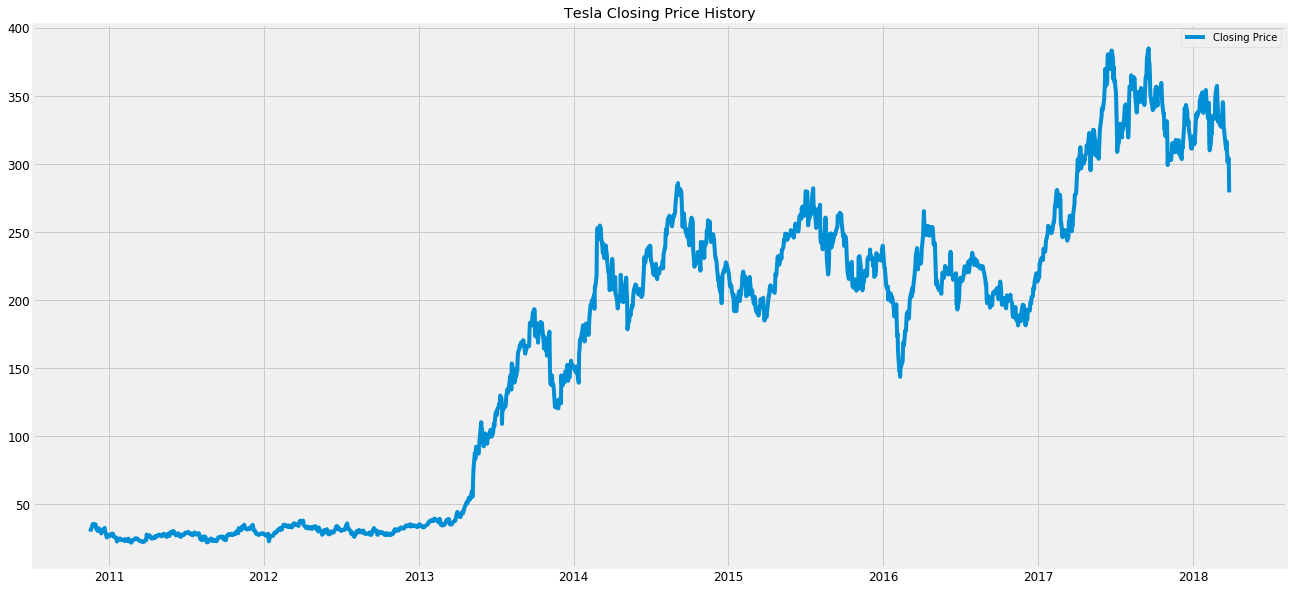

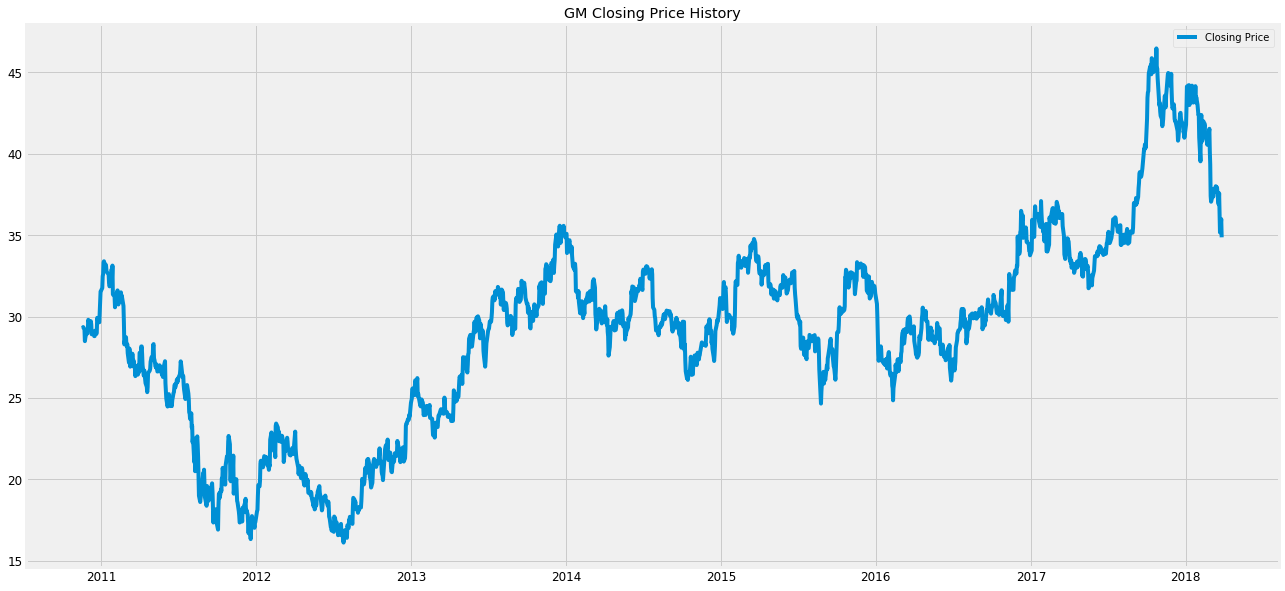

In [7]:
# initial exploration of tesla data
# The adjusted close accounts for stock splits and dividends, so that is what we should graph
plt.figure()
plt.plot(tesla['Adj. Close'], label='Closing Price')
plt.legend()
plt.title('Tesla Closing Price History')
plt.show();

plt.figure()
plt.plot(gm['Adj. Close'], label='Closing Price')
plt.legend()
plt.title('GM Closing Price History')
plt.show();

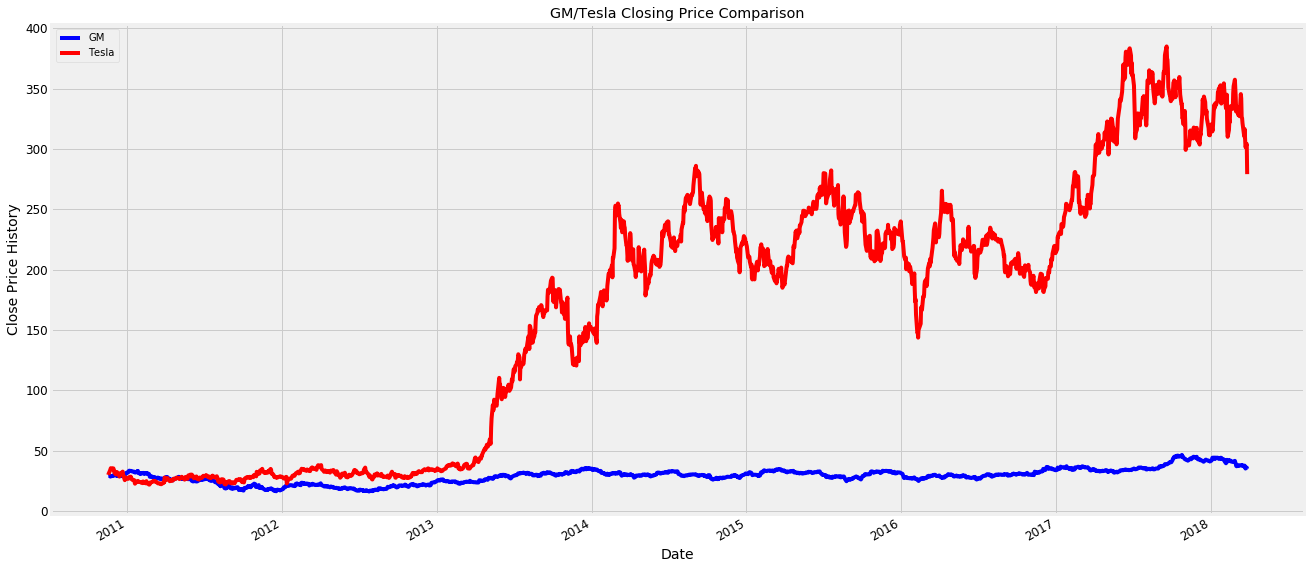

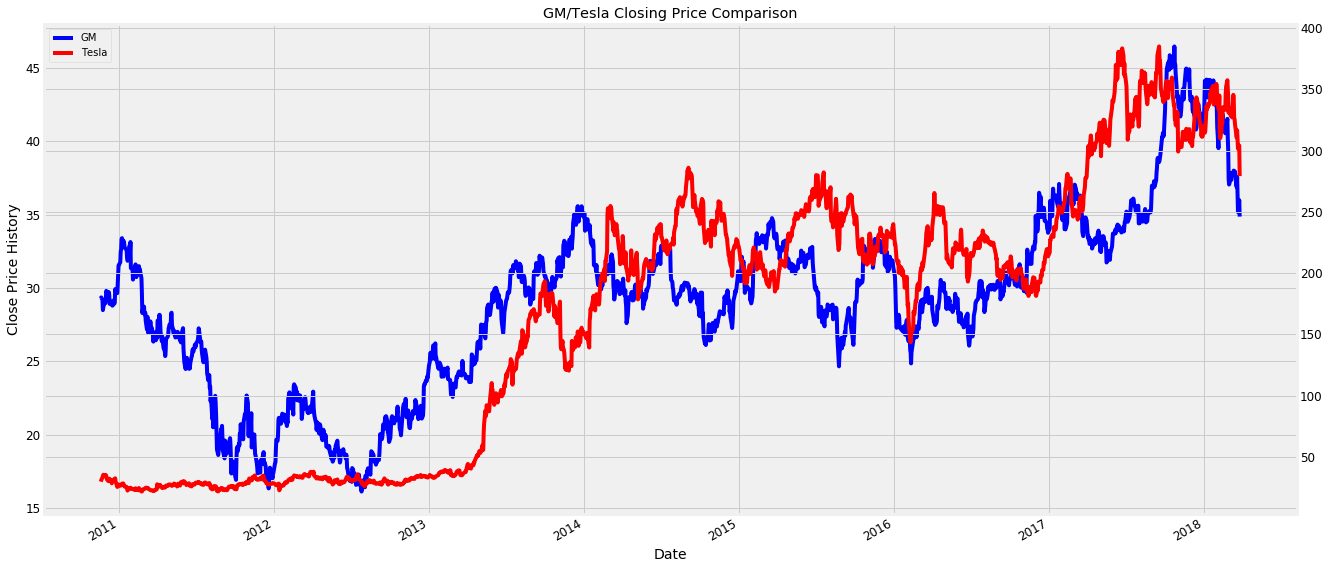

In [8]:
plt.xlabel('Time')
plt.ylabel('Close Price History')

ax1 = gm['Adj. Close'].plot(color='blue', grid=True, label='GM')
ax2 = tesla['Adj. Close'].plot(color='red', grid=True,label='Tesla')


plt.legend(loc=2)
plt.title('GM/Tesla Closing Price Comparison')
plt.show();



plt.xlabel('Time')
plt.ylabel('Close Price History')

ax1 = gm['Adj. Close'].plot(color='blue', grid=True, label='GM')
ax2 = tesla['Adj. Close'].plot(color='red', grid=True, secondary_y=True, label='Tesla')


h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

ax1.legend(h1+h2, l1+l2, loc=2)
plt.title('GM/Tesla Closing Price Comparison')
plt.savefig('images/gm_tesla_close_comp',bbox_inches='tight')
plt.show();


The share price of of both companies is very different, so let's look at market capitalisation instead to get a better comparison. 

This data is not provided by Quandl API but can be computed by multiplying the average number of shares outstanding in each year by the share price.

In [9]:
# Yearly average number of shares outstanding for Tesla and GM from google. Data is not exact, but good enough for this analysis!
tesla_shares = {2018: 168e6, 2017: 162e6, 2016: 144e6, 2015: 128e6, 2014: 125e6, 
                2013: 119e6, 2012: 107e6, 2011: 100e6, 2010: 51e6}

gm_shares = {2018: 1.42e9, 2017: 1.50e9, 2016: 1.54e9, 2015: 1.59e9, 2014: 1.61e9, 
                2013: 1.39e9, 2012: 1.57e9, 2011: 1.54e9, 2010: 1.50e9}

In [10]:
#create market cap columns for tesla
# Create a year column 
tesla['Year'] = tesla.index.year

# Take Dates from index and move to Date column 
tesla.reset_index(level=0, inplace = True)
tesla['market_cap'] = 0

# Calculate market cap for all years
for i, year in enumerate(tesla['Year']):
    # Retrieve the shares for the year
    shares = tesla_shares.get(year)
    
    # Update the cap column to shares times the price
    tesla.loc[i, 'market_cap'] = shares * tesla.loc[i, 'Adj. Close']

In [11]:
#create market cap columns for GM
# Create a year column 
gm['Year'] = gm.index.year

# Take Dates from index and move to Date column 
gm.reset_index(level=0, inplace = True)
gm['market_cap'] = 0

# Calculate market cap for all years
for i, year in enumerate(gm['Year']):
    # Retrieve the shares for the year
    shares = gm_shares.get(year)
    
    # Update the cap column to shares times the price
    gm.loc[i, 'market_cap'] = shares * gm.loc[i, 'Adj. Close']

In [12]:
gm

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,Year,market_cap
0,2010-11-18,35.00,35.99,33.890,34.19,457044300.0,0.0,1.0,29.988317,30.836558,29.037259,29.294302,457044300.0,2010,4.394145e+10
1,2010-11-19,34.15,34.50,33.110,34.26,107842000.0,0.0,1.0,29.260029,29.559912,28.368948,29.354278,107842000.0,2010,4.403142e+10
2,2010-11-22,34.20,34.48,33.810,34.08,36650600.0,0.0,1.0,29.302870,29.542776,28.968714,29.200053,36650600.0,2010,4.380008e+10
3,2010-11-23,33.95,33.99,33.190,33.25,31170200.0,0.0,1.0,29.088668,29.122940,28.437493,28.488901,31170200.0,2010,4.273335e+10
4,2010-11-24,33.73,33.80,33.220,33.48,26138000.0,0.0,1.0,28.900170,28.960146,28.463197,28.685967,26138000.0,2010,4.302895e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1844,2018-03-21,37.16,38.02,37.100,37.58,11412099.0,0.0,1.0,37.160000,38.020000,37.100000,37.580000,11412099.0,2018,5.336360e+10
1845,2018-03-22,37.23,37.33,36.270,36.35,12455805.0,0.0,1.0,37.230000,37.330000,36.270000,36.350000,12455805.0,2018,5.161700e+10
1846,2018-03-23,36.42,36.59,35.130,35.17,12939065.0,0.0,1.0,36.420000,36.590000,35.130000,35.170000,12939065.0,2018,4.994140e+10
1847,2018-03-26,35.94,36.05,35.285,35.99,9251162.0,0.0,1.0,35.940000,36.050000,35.285000,35.990000,9251162.0,2018,5.110580e+10


In [13]:

# Merge the two datasets and rename the columns
market_cap = gm.merge(tesla, how='inner', on='Date')
market_cap.rename(columns={'market_cap_x': 'gm_cap', 'market_cap_y': 'tesla_cap'}, inplace=True)

In [14]:
market_cap

,Date,Open_x,High_x,Low_x,Close_x,Volume_x,Ex-Dividend_x,Split Ratio_x,Adj. Open_x,Adj. High_x,...,Volume_y,Ex-Dividend_y,Split Ratio_y,Adj. Open_y,Adj. High_y,Adj. Low_y,Adj. Close_y,Adj. Volume_y,Year_y,tesla_cap
0,2010-11-18,35.00,35.99,33.890,34.19,457044300.0,0.0,1.0,29.988317,30.836558,...,956100.0,0.0,1.0,30.67,30.74,28.9201,29.89,956100.0,2010,1.524390e+09
1,2010-11-19,34.15,34.50,33.110,34.26,107842000.0,0.0,1.0,29.260029,29.559912,...,1150500.0,0.0,1.0,30.16,31.37,29.7000,30.99,1150500.0,2010,1.580490e+09
2,2010-11-22,34.20,34.48,33.810,34.08,36650600.0,0.0,1.0,29.302870,29.542776,...,1529700.0,0.0,1.0,31.57,33.45,31.5000,33.40,1529700.0,2010,1.703400e+09
3,2010-11-23,33.95,33.99,33.190,33.25,31170200.0,0.0,1.0,29.088668,29.122940,...,1577800.0,0.0,1.0,33.29,35.68,32.1901,34.57,1577800.0,2010,1.763070e+09
4,2010-11-24,33.73,33.80,33.220,33.48,26138000.0,0.0,1.0,28.900170,28.960146,...,1425000.0,0.0,1.0,35.27,35.97,34.3340,35.47,1425000.0,2010,1.808970e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1844,2018-03-21,37.16,38.02,37.100,37.58,11412099.0,0.0,1.0,37.160000,38.020000,...,5927881.0,0.0,1.0,310.25,322.44,310.1900,316.53,5927881.0,2018,5.317704e+10
1845,2018-03-22,37.23,37.33,36.270,36.35,12455805.0,0.0,1.0,37.230000,37.330000,...,4914307.0,0.0,1.0,313.89,318.82,308.1800,309.10,4914307.0,2018,5.192880e+10
1846,2018-03-23,36.42,36.59,35.130,35.17,12939065.0,0.0,1.0,36.420000,36.590000,...,6600538.0,0.0,1.0,311.25,311.61,300.4500,301.54,6600538.0,2018,5.065872e+10
1847,2018-03-26,35.94,36.05,35.285,35.99,9251162.0,0.0,1.0,35.940000,36.050000,...,8324639.0,0.0,1.0,307.34,307.59,291.3600,304.18,8324639.0,2018,5.110224e+10


In [15]:
# Select only the relevant columns
market_cap = market_cap[['Date', 'gm_cap', 'tesla_cap']]

# Divide to get market cap in billions of dollars
market_cap['gm_cap'] = market_cap['gm_cap'] / 1e9
market_cap['tesla_cap'] = market_cap['tesla_cap'] / 1e9

market_cap.head()

,Date,gm_cap,tesla_cap
0,2010-11-18,43.941453,1.52439
1,2010-11-19,44.031417,1.58049
2,2010-11-22,43.800079,1.70340
3,2010-11-23,42.733352,1.76307
4,2010-11-24,43.028951,1.80897


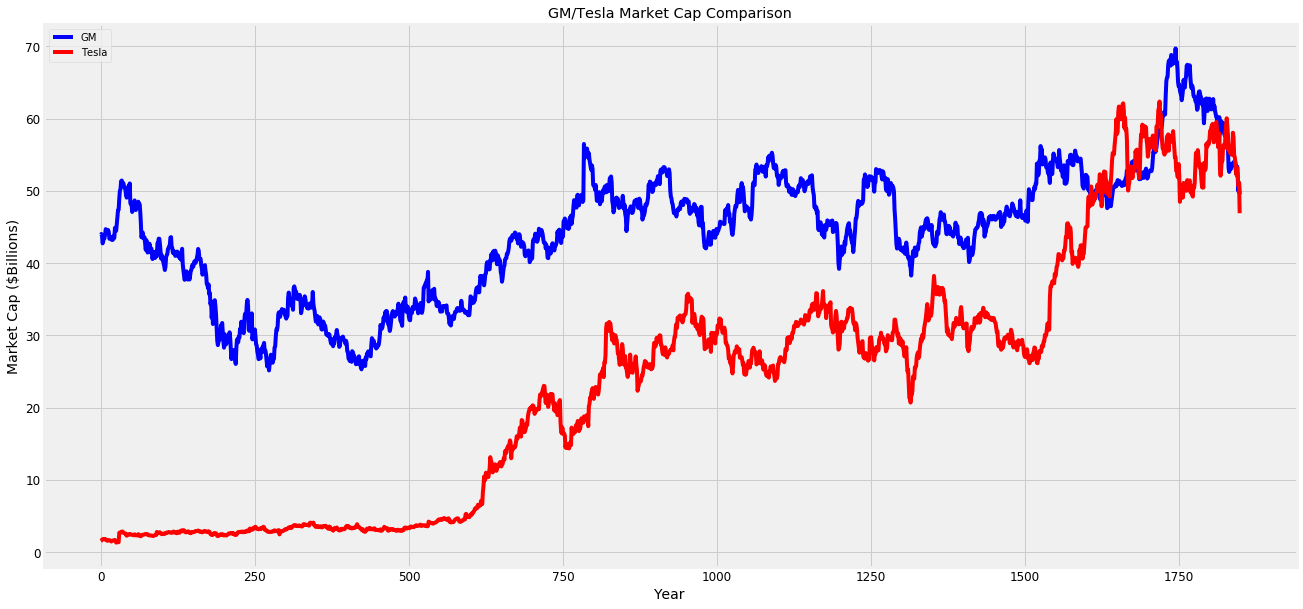

In [16]:
plt.xlabel('Year')
plt.ylabel('Market Cap ($Billions)')

ax1 = market_cap['gm_cap'].plot(color='blue', grid=True, label='GM')
ax2 = market_cap['tesla_cap'].plot(color='red', grid=True,label='Tesla')


plt.legend(h1+h2, l1+l2, loc=2)
plt.title('GM/Tesla Market Cap Comparison')
plt.savefig('images/gm_tesla_mcap_comp',bbox_inches='tight')
plt.show()

In [17]:
market_cap['Date'] = pd.to_datetime(market_cap.Date,format='%Y-%m-%d')

In [18]:
market_cap.index = market_cap['Date']

In [19]:
market_cap.index

DatetimeIndex(['2010-11-18', '2010-11-19', '2010-11-22', '2010-11-23',
               '2010-11-24', '2010-11-26', '2010-11-29', '2010-11-30',
               '2010-12-01', '2010-12-02',
               ...
               '2018-03-14', '2018-03-15', '2018-03-16', '2018-03-19',
               '2018-03-20', '2018-03-21', '2018-03-22', '2018-03-23',
               '2018-03-26', '2018-03-27'],
              dtype='datetime64[ns]', name='Date', length=1849, freq=None)

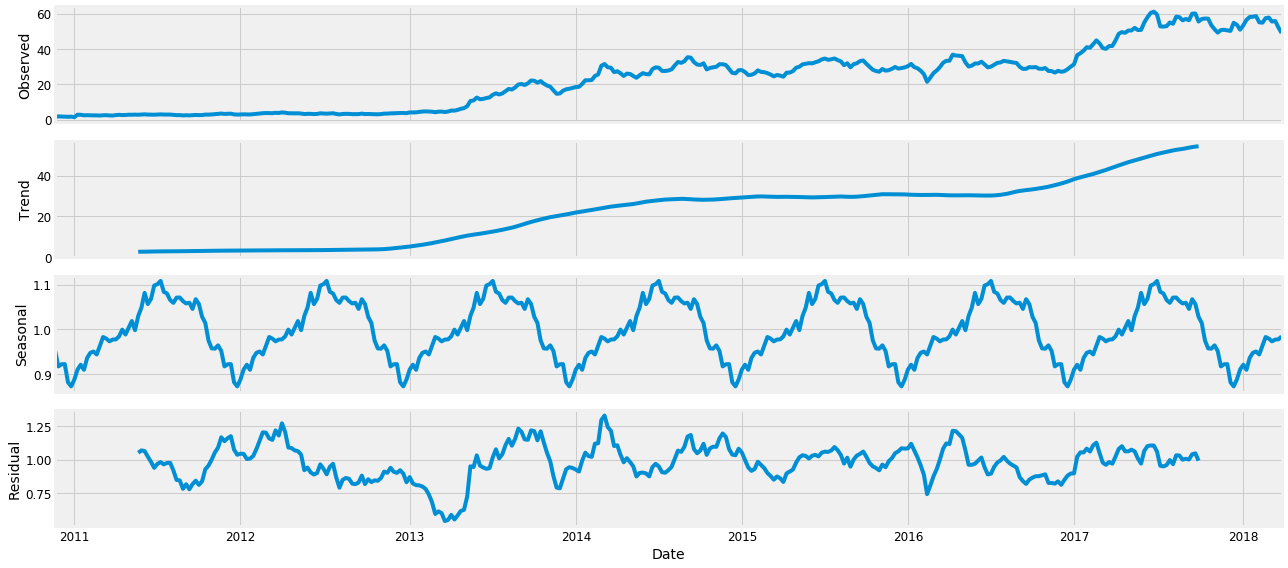

In [20]:
t = market_cap['tesla_cap'].resample('W').mean()
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(t, model='multiplicative')
fig = decomposition.plot()
plt.show()

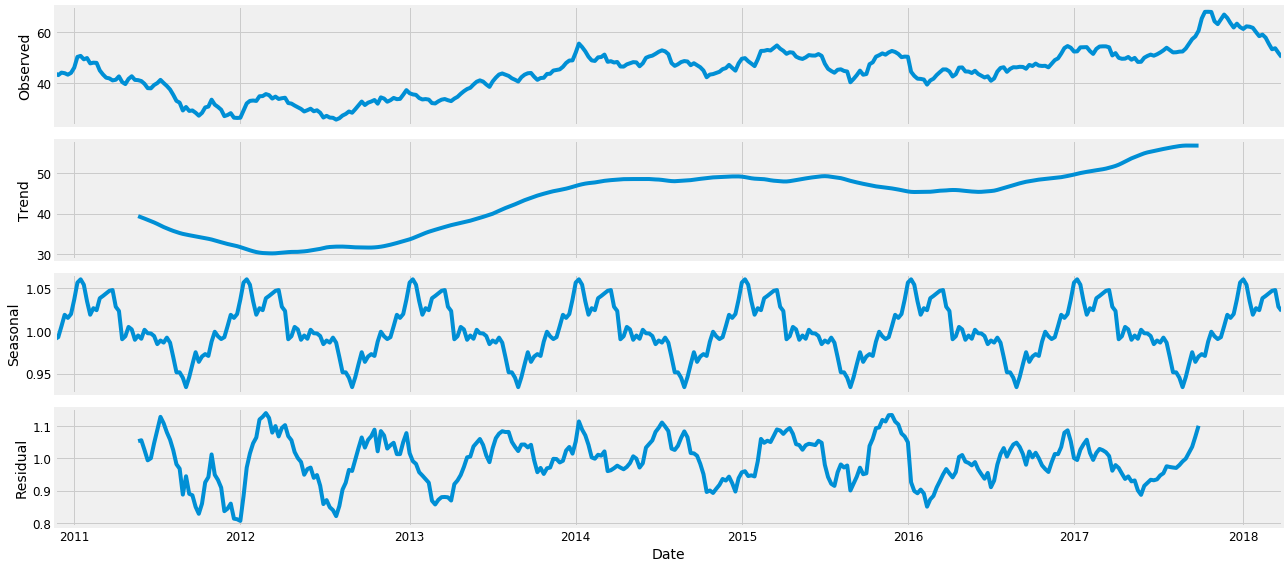

In [21]:
g = market_cap['gm_cap'].resample('W').mean()
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(g, model='multiplicative')
fig = decomposition.plot()
plt.show()

## Time Series Forecasting

### 1. Moving Average

The simplest way to predict future values is just to take the average of a set of previously observed values. The predicted closing price for each day will be the average of a set of previously observed values. Instead of using the simple average, this is the moving average, which uses the latest set of values for each prediction. I.e. for each subsequent step, the predicted values are taken into consideration while removing the oldest observed value from the set.

This is evaluated with root-mean-square error (RMSE)

In [22]:
tesla_train = market_cap.loc[:'2017-03-27',['tesla_cap']]
tesla_valid =  market_cap.loc['2017-03-27':,['tesla_cap']]

In [23]:
preds_tesla = []
for i in range(0,tesla_valid.shape[0]):
    a = tesla_train['tesla_cap'][len(tesla_train)-248+i:].sum() + sum(preds_tesla)
    b = a/(len(tesla_valid))
    preds_tesla.append(b)

# checking the results (RMSE value)
rms_tesla=np.sqrt(np.mean(np.power((np.array(tesla_valid['tesla_cap'])-preds_tesla),2)))
print('\n RMSE value on validation set:')
print(rms_tesla)


 RMSE value on validation set:
21.741962249585633


In [24]:
tesla_valid['Predictions'] = 0
tesla_valid['Predictions'] = preds_tesla

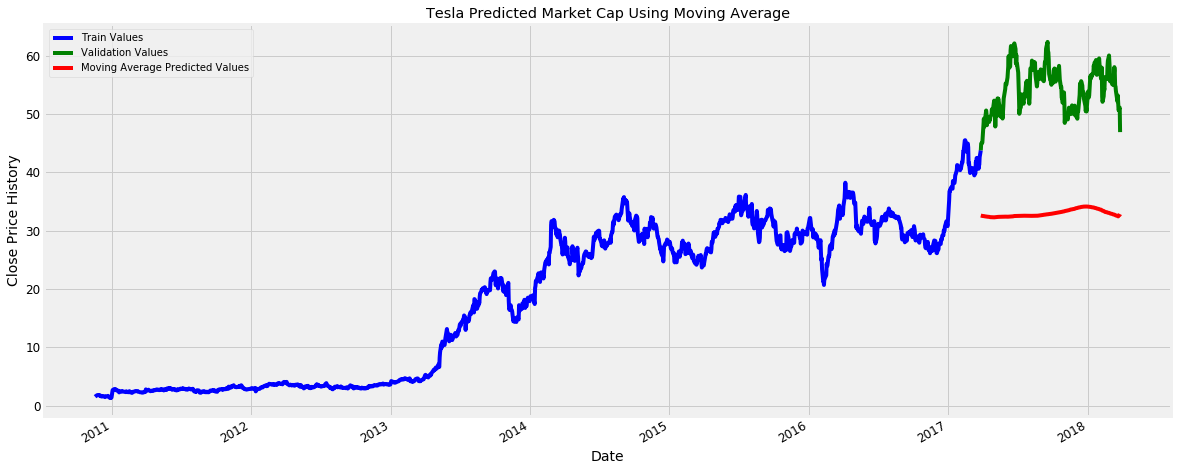

In [25]:
plt.xlabel('Year')
plt.ylabel('Close Price History')

ax1 = tesla_train.tesla_cap.plot(color='blue', grid=True, label='Train Values')
ax2 = tesla_valid.tesla_cap.plot(color='green',grid=True, label='Validation Values')
ax3 = tesla_valid.Predictions.plot(color='red',grid=True,label='Moving Average Predicted Values')


plt.legend()
plt.title('Tesla Predicted Market Cap Using Moving Average')
plt.savefig('images/tesla_moving_average_pred',bbox_inches='tight')
plt.show()

As you can see, moving average is not that good at predicting future prices

### 2. Regression

In [26]:
new_data_tesla = pd.DataFrame(index=range(0,len(market_cap)),columns=['Date', 'tesla_cap'])
for i in range(0,len(market_cap)):
    new_data_tesla['Date'][i] = market_cap['Date'][i]
    new_data_tesla['tesla_cap'][i] = market_cap['tesla_cap'][i]
new_data_tesla.head()

,Date,tesla_cap
0,2010-11-18 00:00:00,1.52439
1,2010-11-19 00:00:00,1.58049
2,2010-11-22 00:00:00,1.7034
3,2010-11-23 00:00:00,1.76307
4,2010-11-24 00:00:00,1.80897


In [27]:
#create features
from fastai.tabular import  add_datepart
add_datepart(new_data_tesla, 'Date')
new_data_tesla.drop('Elapsed', axis=1, inplace=True)  #elapsed will be the time stamp
new_data_tesla.head()

,tesla_cap,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start
0,1.52439,2010,11,46,18,3,322,False,False,False,False,False,False
1,1.58049,2010,11,46,19,4,323,False,False,False,False,False,False
2,1.7034,2010,11,47,22,0,326,False,False,False,False,False,False
3,1.76307,2010,11,47,23,1,327,False,False,False,False,False,False
4,1.80897,2010,11,47,24,2,328,False,False,False,False,False,False


In [28]:
new_data_tesla.replace(False, 0, inplace=True)

In [29]:
new_data_tesla.replace(True, 1, inplace=True)

In [30]:
#split into train and validation
train = new_data_tesla[:1598]
valid = new_data_tesla[1597:]

x_train = train.drop('tesla_cap', axis=1)
y_train = train['tesla_cap']
x_valid = valid.drop('tesla_cap', axis=1)
y_valid = valid['tesla_cap']

#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
#make predictions and find the rmse
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

11.552937787818891

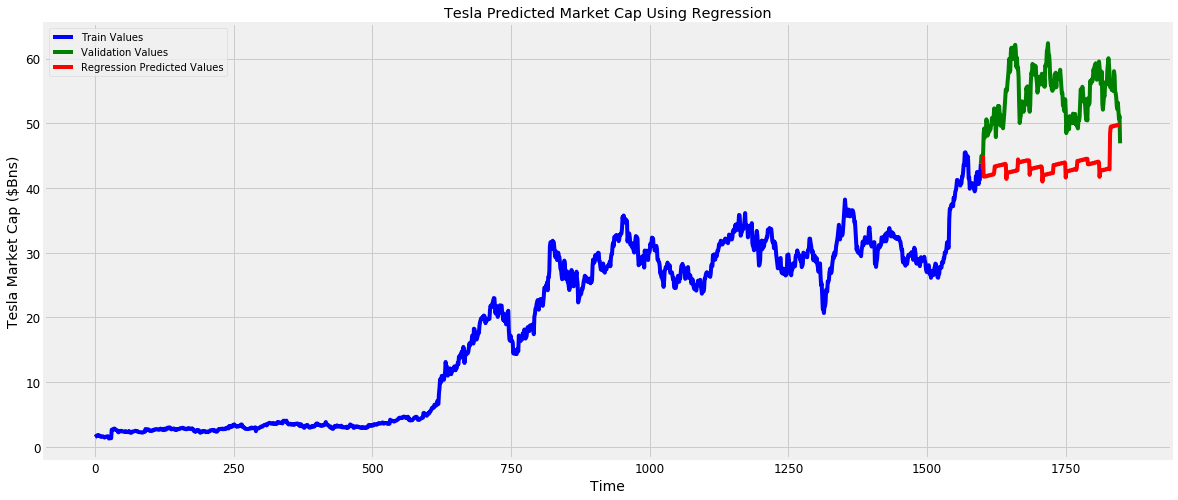

In [32]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds

valid.index = new_data_tesla[1597:].index
train.index = new_data_tesla[:1598].index


plt.xlabel('Time')
plt.ylabel('Tesla Market Cap ($Bns)')

ax1 = train.tesla_cap.plot(color='blue', grid=True, label='Train Values')
ax2 = valid.tesla_cap.plot(color='green',grid=True, label='Validation Values')
ax3 = valid.Predictions.plot(color='red',grid=True,label='Regression Predicted Values')

plt.title('Tesla Predicted Market Cap Using Regression')
plt.savefig('images/tesla_regression_pred',bbox_inches='tight')
plt.legend()
plt.show()

Slightly better, but still not a good forecasting model

### 3. SARIMA

In [33]:
t = market_cap['tesla_cap'].resample('MS').mean()

In [34]:
mod = sm.tsa.statespace.SARIMAX(t,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3353      2.190     -0.153      0.878      -4.628       3.957
ma.L1          0.3826      2.148      0.178      0.859      -3.828       4.593
ar.S.L12      -0.5868      0.142     -4.140      0.000      -0.865      -0.309
sigma2        13.6551      2.528      5.401      0.000       8.699      18.611


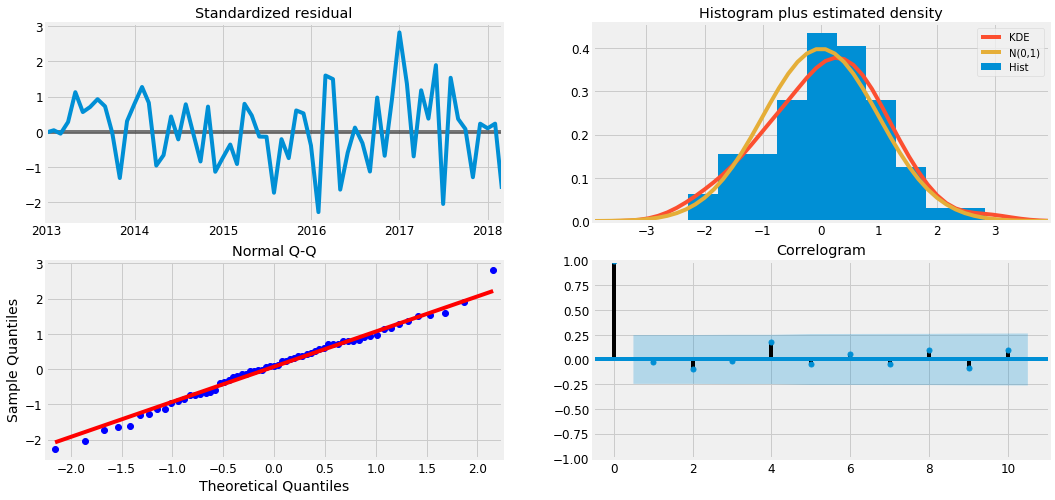

In [35]:
results.plot_diagnostics(figsize=(16, 8))
plt.savefig('images/tesla_sarima_diag',bbox_inches='tight')
plt.show()

In [36]:
t = t.to_frame()

In [37]:
t.loc['2017-03-01']

tesla_cap    41.821357
Name: 2017-03-01 00:00:00, dtype: float64

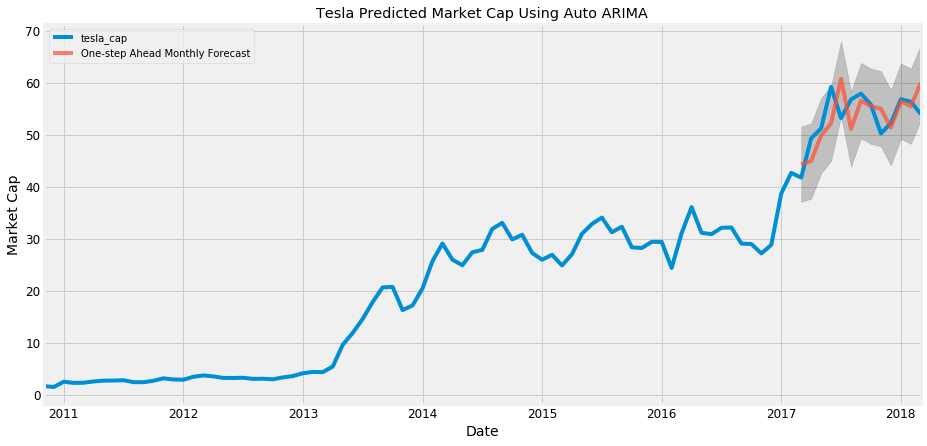

In [71]:
pred = results.get_prediction(start=pd.to_datetime('2017-03-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = t['2010':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step Ahead Monthly Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Market Cap')
plt.title('Tesla Predicted Market Cap Using Auto ARIMA')
plt.legend(loc=2)
plt.savefig('images/tesla_sarima_pred',bbox_inches='tight')

plt.show()

In [39]:
y_forecasted = pred.predicted_mean
y_truth = t['2017-03-05':]['tesla_cap']

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 4.29


Much better! But this is only predicting one month ahead at a time. 



### 4. Prophet

In [40]:
import fbprophet

In [41]:
tesla =tesla.rename(columns={'Date': 'ds', 'market_cap': 'y'})
tesla['y'] = tesla['y'] / 1e9

;

''

In [42]:
tesla_train = tesla[:1598]
tesla_valid = tesla[1598:]
tesla_prophet = fbprophet.Prophet(changepoint_prior_scale=0.05, n_changepoints=10)
tesla_prophet.fit(tesla_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [43]:
tesla_forecast = tesla_prophet.make_future_dataframe(periods=365, freq='B')
tesla_forecast = tesla_prophet.predict(tesla_forecast)

In [44]:
forecast_valid = tesla_forecast[['ds','yhat']]

In [45]:
forecast_df = pd.DataFrame(forecast_valid)

In [46]:

tesla_valid = pd.merge(tesla_valid, forecast_df, on='ds')

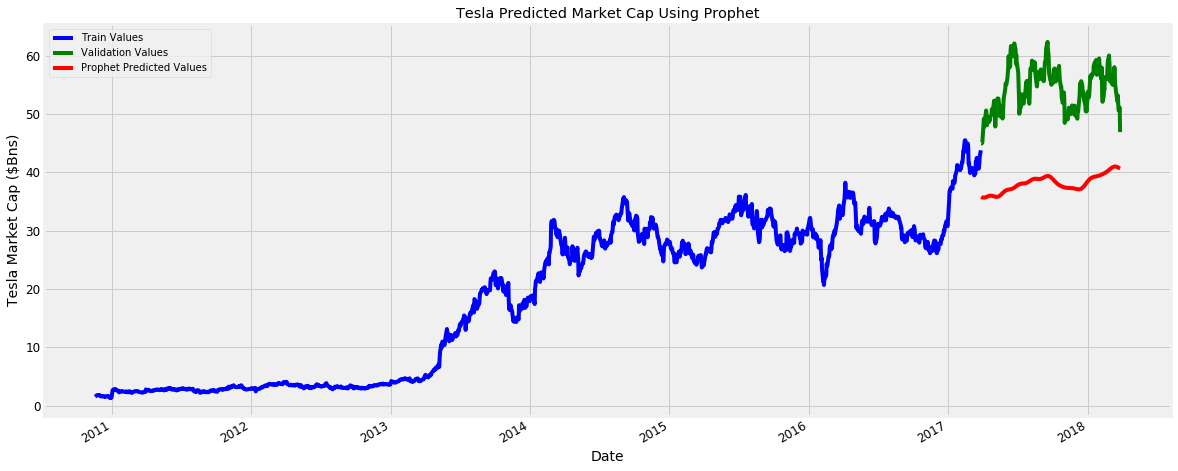

In [47]:


ax1 = tesla_train.set_index('ds',drop=False)['y'].plot(color='blue',grid=True,label='Train Values')
ax2 = tesla_valid.set_index('ds',drop=False)['y'].plot(color='green',grid=True, label='Validation Values')
ax3 = tesla_valid.set_index('ds',drop=False)['yhat'].plot(color='red',grid=True, label='Prophet Predicted Values')
plt.xlabel('Date')
plt.ylabel('Tesla Market Cap ($Bns)')
plt.title('Tesla Predicted Market Cap Using Prophet')
plt.legend()
plt.savefig('images/tesla_prophet_pred',bbox_inches='tight')
plt.show()

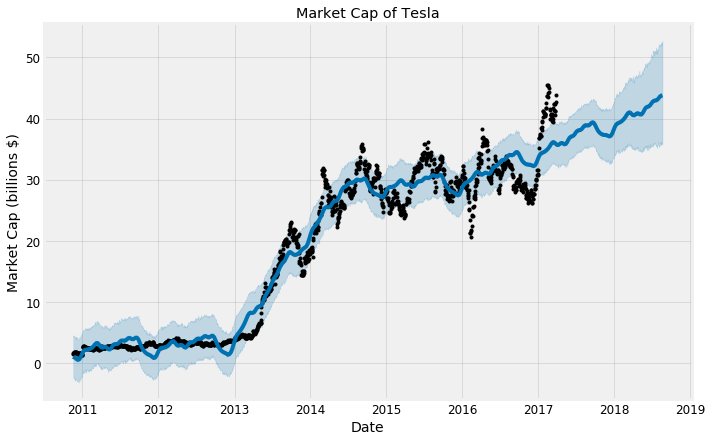

In [48]:
tesla_prophet.plot(tesla_forecast, xlabel = 'Date', ylabel = 'Market Cap (billions $)')
plt.title('Market Cap of Tesla');

In [49]:

# Prophet requires columns ds (Date) and y (value)
gm = gm.rename(columns={'Date': 'ds', 'market_cap': 'y'})
# Put market cap in billions
gm['y'] = gm['y'] / 1e9

# Make the prophet models and fit on the data
# changepoint_prior_scale can be changed to achieve a better fit
gm_prophet = fbprophet.Prophet(changepoint_prior_scale=0.05)
gm_prophet.fit(gm)

# Repeat for the tesla data
tesla =tesla.rename(columns={'Date': 'ds', 'market_cap': 'y'})
# tesla['y'] = tesla['y'] / 1e9
tesla_prophet = fbprophet.Prophet(changepoint_prior_scale=0.05, n_changepoints=10)
tesla_prophet.fit(tesla);

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [50]:
# Make a future dataframe for 2 years
gm_forecast = gm_prophet.make_future_dataframe(periods=365 * 2, freq='D')
# Make predictions
gm_forecast = gm_prophet.predict(gm_forecast)

tesla_forecast = tesla_prophet.make_future_dataframe(periods=365*2, freq='D')
tesla_forecast = tesla_prophet.predict(tesla_forecast)

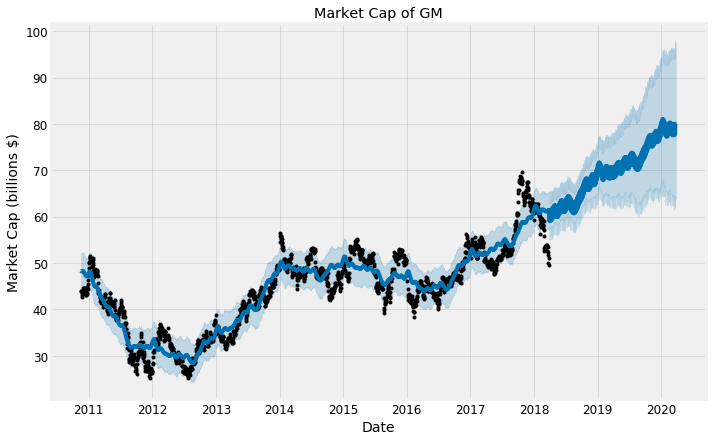

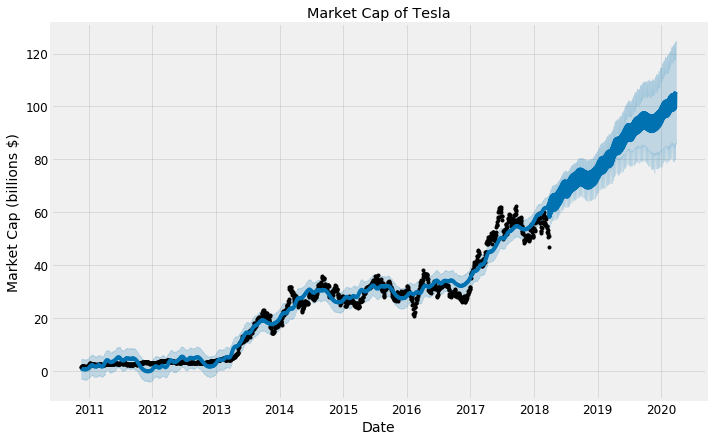

In [51]:
gm_prophet.plot(gm_forecast, xlabel = 'Date', ylabel = 'Market Cap (billions $)')
plt.title('Market Cap of GM');
tesla_prophet.plot(tesla_forecast, xlabel = 'Date', ylabel = 'Market Cap (billions $)')
plt.title('Market Cap of Tesla');

In [52]:
gm_names = ['gm_%s' % column for column in gm_forecast.columns]
tesla_names = ['tesla_%s' % column for column in tesla_forecast.columns]

merge_gm_forecast = gm_forecast.copy()
merge_tesla_forecast = tesla_forecast.copy()

merge_gm_forecast.columns = gm_names
merge_tesla_forecast.columns = tesla_names

forecast = pd.merge(merge_gm_forecast, merge_tesla_forecast, how = 'inner', left_on = 'gm_ds', right_on = 'tesla_ds')

forecast = forecast.rename(columns={'gm_ds': 'Date'}).drop('tesla_ds', axis=1)
forecast.head()

,Date,gm_trend,gm_yhat_lower,gm_yhat_upper,gm_trend_lower,gm_trend_upper,gm_additive_terms,gm_additive_terms_lower,gm_additive_terms_upper,gm_weekly,...,tesla_weekly,tesla_weekly_lower,tesla_weekly_upper,tesla_yearly,tesla_yearly_lower,tesla_yearly_upper,tesla_multiplicative_terms,tesla_multiplicative_terms_lower,tesla_multiplicative_terms_upper,tesla_yhat
0,2010-11-18,46.974792,44.656056,51.922455,46.974792,46.974792,1.299257,1.299257,1.299257,0.693733,...,1.564576,1.564576,1.564576,-2.650848,-2.650848,-2.650848,0.0,0.0,0.0,0.902939
1,2010-11-19,46.934257,44.129922,52.135705,46.934257,46.934257,1.278007,1.278007,1.278007,0.633863,...,1.542904,1.542904,1.542904,-2.684206,-2.684206,-2.684206,0.0,0.0,0.0,0.843105
2,2010-11-22,46.812653,44.140937,52.153921,46.812653,46.812653,1.439760,1.439760,1.439760,0.656063,...,1.618101,1.618101,1.618101,-2.770222,-2.770222,-2.770222,0.0,0.0,0.0,0.817876
3,2010-11-23,46.772118,44.582707,52.119663,46.772118,46.772118,1.448474,1.448474,1.448474,0.614898,...,1.597762,1.597762,1.597762,-2.794247,-2.794247,-2.794247,0.0,0.0,0.0,0.768708
4,2010-11-24,46.731583,44.473057,51.913535,46.731583,46.731583,1.574413,1.574413,1.574413,0.691686,...,1.634265,1.634265,1.634265,-2.815997,-2.815997,-2.815997,0.0,0.0,0.0,0.778657


#### Visualising the Trend

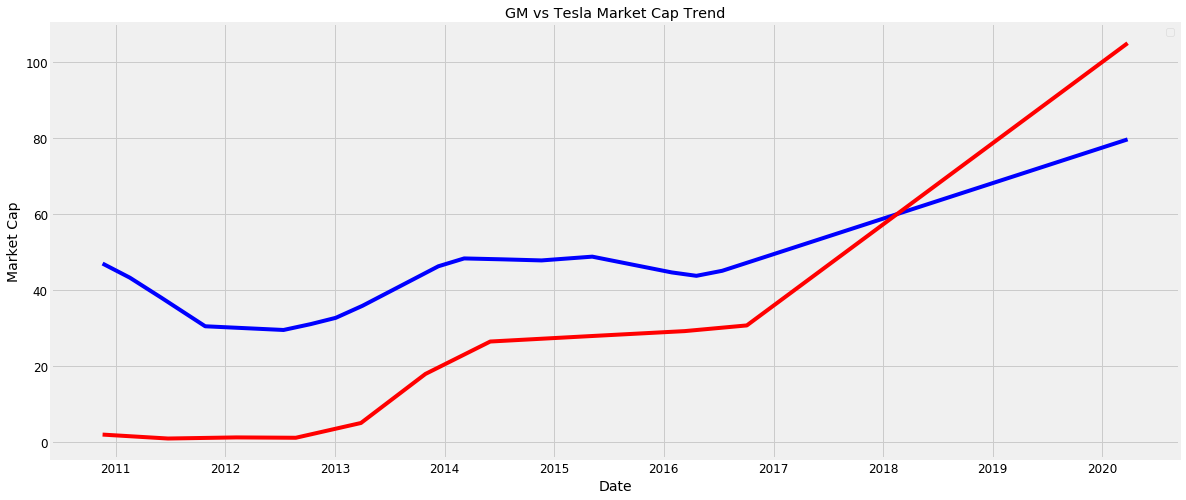

In [53]:

plt.plot(forecast['Date'], forecast['gm_trend'], 'b-')
plt.plot(forecast['Date'], forecast['tesla_trend'], 'r-')
plt.legend();
plt.xlabel('Date'); plt.ylabel('Market Cap')
plt.title('GM vs Tesla Market Cap Trend');

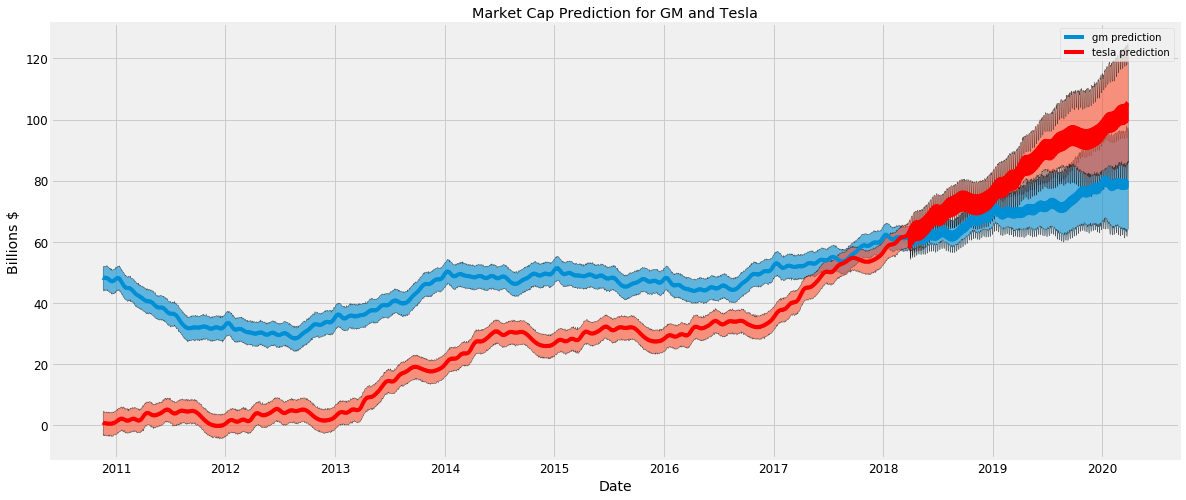

In [54]:
# Create subplots to set figure size
fig, ax = plt.subplots(1, 1);

# Plot estimate
ax.plot(forecast['Date'], forecast['gm_yhat'], label = 'gm prediction');

# Plot uncertainty values
ax.fill_between(forecast['Date'].dt.to_pydatetime(), forecast['gm_yhat_upper'], forecast['gm_yhat_lower'], alpha=0.6, edgecolor = 'k');

# Plot estimate and uncertainty for tesla
ax.plot(forecast['Date'], forecast['tesla_yhat'], 'r', label = 'tesla prediction');
ax.fill_between(forecast['Date'].dt.to_pydatetime(), forecast['tesla_yhat_upper'], forecast['tesla_yhat_lower'], alpha=0.6, edgecolor = 'k');
plt.legend()
plt.savefig('images/gm_tesla_mcap_prophet_pred',bbox_inches='tight')
plt.xlabel('Date'); plt.ylabel('Billions $'); plt.title('Market Cap Prediction for GM and Tesla');

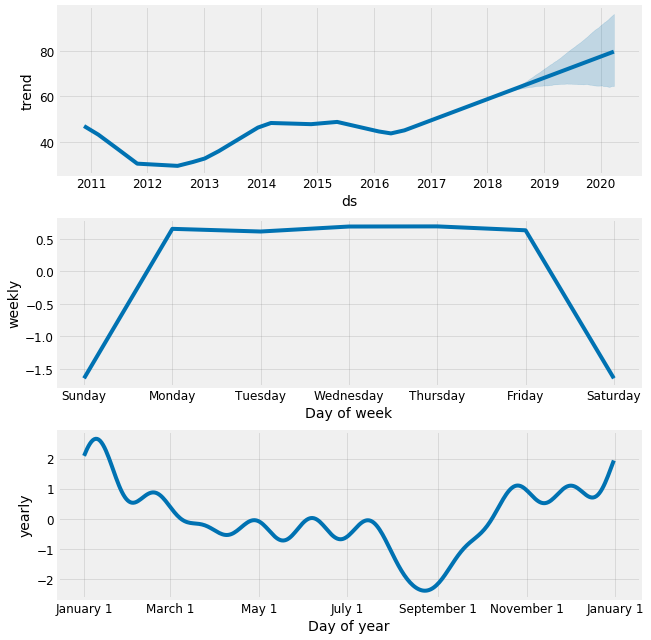

In [55]:
gm_prophet.plot_components(gm_forecast)
plt.savefig('images/gm_forecast',bbox_inches='tight');


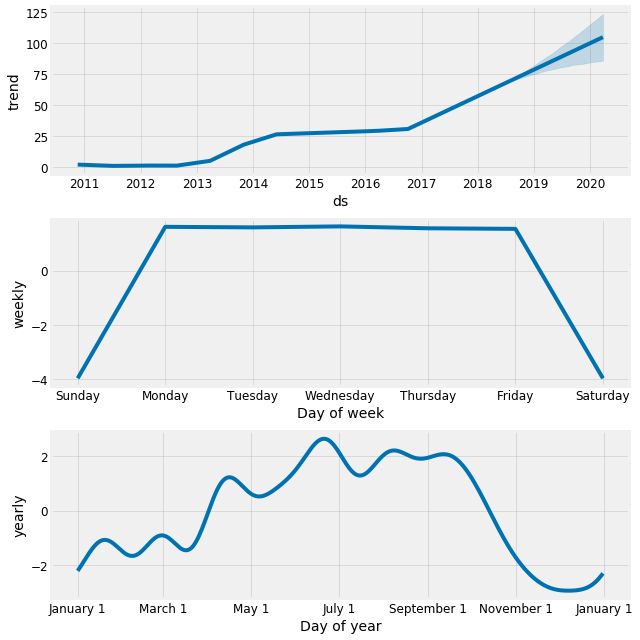

In [56]:
tesla_prophet.plot_components(tesla_forecast)
plt.savefig('images/tesla_forecast',bbox_inches='tight')


### LSTM

In [57]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [58]:
new_data = pd.DataFrame(index=range(0,len(market_cap)),columns=['Date', 'tesla_cap'])
for i in range(0,len(market_cap)):
    new_data['Date'][i] = market_cap['Date'][i]
    new_data['tesla_cap'][i] = market_cap['tesla_cap'][i]


In [59]:
#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values



In [60]:
train = dataset[0:1598,:]
valid = dataset[1597:,:]

In [61]:
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [62]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [63]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [64]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

1538/1538 - 40s - loss: 0.0012


In [65]:
#predicting 252 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [66]:
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

In [67]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
mcap = model.predict(X_test)
mcap = scaler.inverse_transform(mcap)

In [68]:
rms=np.sqrt(np.mean(np.power((valid-mcap),2)))
rms

2.5539234847235734

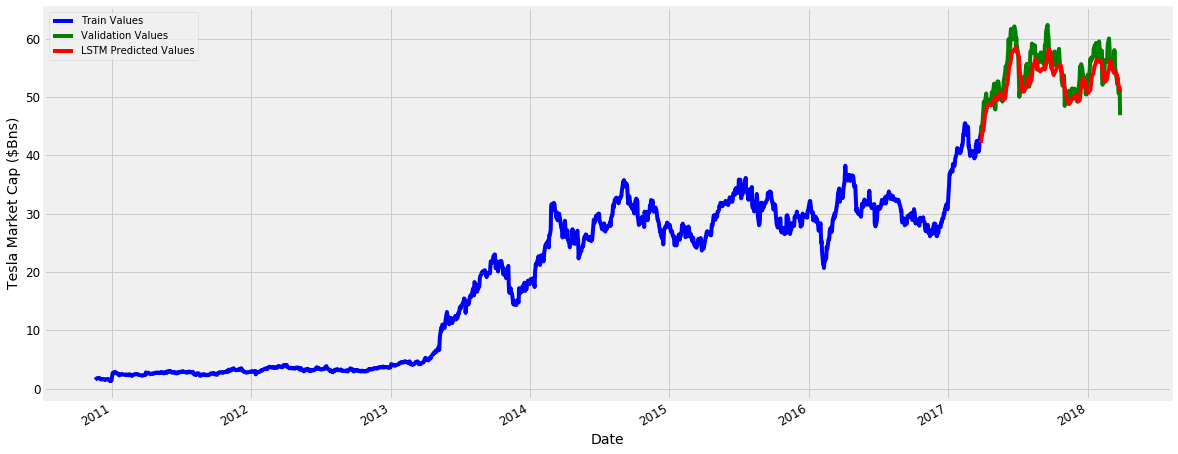

In [69]:
#for plotting
train = new_data[:1598]
valid = new_data[1597:]
valid['Predictions'] = mcap
# plt.plot(train['tesla_cap'])
# plt.plot(valid[['tesla_cap','Predictions']])

plt.xlabel('Year')
plt.ylabel('Tesla Market Cap ($Bns)')

ax1 = train.tesla_cap.plot(color='blue', grid=True, label='Train Values')
ax2 = valid.tesla_cap.plot(color='green',grid=True, label='Validation Values')
ax3 = valid.Predictions.plot(color='red',grid=True,label='LSTM Predicted Values')


plt.legend()
plt.savefig('images/tesla_mcap_lstm_pred',bbox_inches='tight')
plt.show()